In [6]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Transmon, single-tone
rwa_wd_red_larger = [1.2654, 1.2648, 1.2641, 1.2631, 1.2619, 1.2605, 1.2569]
rwa_shift_red_larger = [0.0308, 0.0296, 0.0281, 0.0261, 0.0238, 0.0209, 0.0138]
rwa_shift_th_red_larger = [0.031, 0.030, 0.028, 0.027, 0.024, 0.021, 0.014]
rwa_wsb_red_larger = [0.000079, 0.000170, 0.000307, 0.000488, 0.000691, 0.000943, 0.001568]
rwa_wd_blue_larger = [5.2387, 5.2316, 5.2212, 5.2078, 5.1909, 5.1704]
rwa_shift_blue_larger = [-0.0226, -0.0368, -0.0576, -0.0845, -0.1182, -0.1592]
rwa_shift_th_blue_larger = [-0.023, -0.038, -0.058, -0.083, -0.111, -0.143]
rwa_wsb_blue_larger = [0.0009179, 0.00198, 0.00355, 0.00560, 0.00814, 0.01122]

fp_wd_red_larger = [1.2584, 1.2571, 1.2552, 1.2529, 1.2500, 1.2465, 1.2380]
fp_shift_red_larger = [0.0168, 0.0141, 0.0104, 0.00573, 0.0000, -0.0071, -0.024]
fp_shift_th_red_larger = [0.018, 0.017, 0.015, 0.013, 0.011, 0.008, 0.001]
fp_wsb_red_larger = [0.0002106, 0.000476, 0.000851, 0.001328, 0.001923, 0.002641, 0.004443]
fp_wd_blue_larger = [5.2274, 5.2158, 5.1988, 5.1767, 5.1447, 5.1078, 5.0245]
fp_shift_blue_larger = [-0.0452, -0.0685, -0.1024, -0.1466, -0.2106, -0.2844, -0.4510]
fp_shift_th_blue_larger = [-0.039, -0.053, -0.072, -0.095, -0.120, -0.147, -0.202]
fp_wsb_blue_larger = [0.001606, 0.003678, 0.006717, 0.01048, 0.01597, 0.02221, 0.03798]

eps_larger = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]
power_larger = 2*np.asarray(eps_larger)**2

rwa_wd_red_smaller = [1.2675, 1.2695, 1.2721, 1.2754, 1.2796, 1.2845, 1.2965]
rwa_shift_red_smaller = [0.035, 0.039, 0.0442, 0.0508, 0.0592, 0.0689, 0.093]
rwa_shift_th_red_smaller = [0.035, 0.039, 0.044, 0.050, 0.058, 0.068, 0.092]
rwa_wsb_red_smaller = [0.0001758, 0.000371, 0.000665, 0.000983, 0.001402, 0.00194, 0.003177]
rwa_wd_blue_smaller = [5.2405, 5.2352, 5.2276, 5.2179, 5.2061, 5.1922, 5.1581]
rwa_shift_blue_smaller = [-0.019, -0.0297, -0.0448, -0.0643, -0.0878, -0.1157, -0.1838]
rwa_shift_th_blue_smaller = [-0.019, -0.031, -0.047, -0.069, -0.097, -0.130, -0.220]
rwa_wsb_blue_smaller = [0.0007755, 0.001726, 0.003057, 0.004736, 0.006772, 0.009120, 0.01471]

fp_wd_red_smaller = [1.2833, 1.2884, 1.2958, 1.3064, 1.3187, 1.3350, 1.3816]
fp_shift_red_smaller = [0.0666, 0.0768, 0.0916, 0.1127, 0.1374, 0.1700, 0.2632]
fp_shift_th_red_smaller = [0.061, 0.065, 0.070, 0.077, 0.085, 0.095, 0.121]
fp_wsb_red_smaller = [0.0005165, 0.001128, 0.001996, 0.003153, 0.004547, 0.006282, 0.01132]
fp_wd_blue_smaller = [5.2274, 5.2158, 5.1988, 5.1767, 5.1447, 5.1078, 5.0245]
fp_shift_blue_smaller = [-0.0452, -0.0685, -0.1024, -0.1466, -0.2106, -0.2844, -0.4510]
fp_shift_th_blue_smaller = [-0.039, -0.053, -0.072, -0.095, -0.120, -0.147, -0.202]
fp_wsb_blue_smaller = [0.001606, 0.003678, 0.006717, 0.01048, 0.01597, 0.02221, 0.03798]

eps_smaller = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]
power_smaller = 2*np.asarray(eps_smaller)**2

In [8]:
b, a, nq, nc = ops(10, 10)
Hc = 0.2*2*pi*(a + a.dag())*(b + b.dag())
eps_range = np.linspace(0.0, 1, 16)

rwa_wd_th_sbs_red_larger = list()
rwa_wd_th_sbs_blue_larger = list()
rwa_wd_th_sbs_red_smaller = list()
rwa_wd_th_sbs_blue_smaller = list()
fp_wd_th_sbs_red_larger = list()
fp_wd_th_sbs_blue_larger = list()
fp_wd_th_sbs_red_smaller = list()
fp_wd_th_sbs_blue_smaller = list()

for eps in eps_range:
    Hi = 6.5*2*pi*nq + 4.0*2*pi*nc - 0.2*2*pi/2*b.dag()*b.dag()*b*b
    rwa_wd_th_sbs_red_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 1, Ec=0.2*2*pi,
                                      eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    rwa_wd_th_sbs_blue_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 1, Ec=0.2*2*pi,
                                       eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    
    Hi = 4.0*2*pi*nq + 6.5*2*pi*nc - 0.2*2*pi/2*b.dag()*b.dag()*b*b
    rwa_wd_th_sbs_red_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 1, Ec=0.2*2*pi,
                                       eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    rwa_wd_th_sbs_blue_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 1, Ec=0.2*2*pi,
                                        eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    
    Hi = (6.5+0.2)*2*pi*nq + 4.0*2*pi*nc - 0.2*2*pi/12*(b + b.dag())**4
    fp_wd_th_sbs_red_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 1,  Ec=0.2*2*pi,
                                      eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    fp_wd_th_sbs_blue_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 1, Ec=0.2*2*pi,
                                       eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    
    Hi = (4.0+0.2)*2*pi*nq + 6.5*2*pi*nc - 0.2*2*pi/12*(b + b.dag())**4
    fp_wd_th_sbs_red_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 1, Ec=0.2*2*pi,
                                       eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    fp_wd_th_sbs_blue_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 1, Ec=0.2*2*pi,
                                        eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)

rwa_wd_th_sw_red_larger = list()
rwa_wd_th_sw_blue_larger = list()
rwa_wd_th_sw_red_smaller = list()
rwa_wd_th_sw_blue_smaller = list()
fp_wd_th_sw_red_larger = list()
fp_wd_th_sw_blue_larger = list()
fp_wd_th_sw_red_smaller = list()
fp_wd_th_sw_blue_smaller = list()

for eps in eps_range:
    Hi = 6.5*2*pi*nq + 4.0*2*pi*nc - 0.2*2*pi/2*b.dag()*b.dag()*b*b
    rwa_wd_th_sw_red_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 1, Ec=0.2*2*pi,
                                    eps=2*eps*2*pi, resolution=0.0001*2*pi, method='SW',
                                    anharm='linear', verbose=False)/2/pi)
    rwa_wd_th_sw_blue_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 1, Ec=0.2*2*pi,
                                     eps=2*eps*2*pi, resolution=0.0001*2*pi, method='SW',
                                     anharm='linear', verbose=False)/2/pi)
    
    Hi = 4.0*2*pi*nq + 6.5*2*pi*nc - 0.2*2*pi/2*b.dag()*b.dag()*b*b
    rwa_wd_th_sw_red_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 1, Ec=0.2*2*pi,
                                     eps=2*eps*2*pi, resolution=0.0001*2*pi, method='SW',
                                     anharm='linear', verbose=False)/2/pi)
    rwa_wd_th_sw_blue_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 1, Ec=0.2*2*pi,
                                      eps=2*eps*2*pi, resolution=0.0001*2*pi, method='SW',
                                      anharm='linear', verbose=False)/2/pi)
    
    Hi = (6.5+0.2)*2*pi*nq + 4.0*2*pi*nc - 0.2*2*pi/12*(b + b.dag())**4
    fp_wd_th_sw_red_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 1,  Ec=0.2*2*pi,
                                   eps=2*eps*2*pi, resolution=0.0001*2*pi, method='SW',
                                   anharm='nonlinear', verbose=False)/2/pi)
    fp_wd_th_sw_blue_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 1, Ec=0.2*2*pi,
                                    eps=2*eps*2*pi, resolution=0.0001*2*pi, method='SW',
                                    anharm='nonlinear', verbose=False)/2/pi)
    
    Hi = (4.0+0.2)*2*pi*nq + 6.5*2*pi*nc - 0.2*2*pi/12*(b + b.dag())**4
    fp_wd_th_sw_red_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 1, Ec=0.2*2*pi,
                                    eps=2*eps*2*pi, resolution=0.0001*2*pi, method='SW',
                                    anharm='nonlinear', verbose=False)/2/pi)
    fp_wd_th_sw_blue_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 1, Ec=0.2*2*pi,
                                     eps=2*eps*2*pi, resolution=0.0001*2*pi, method='SW',
                                     anharm='nonlinear', verbose=False)/2/pi)

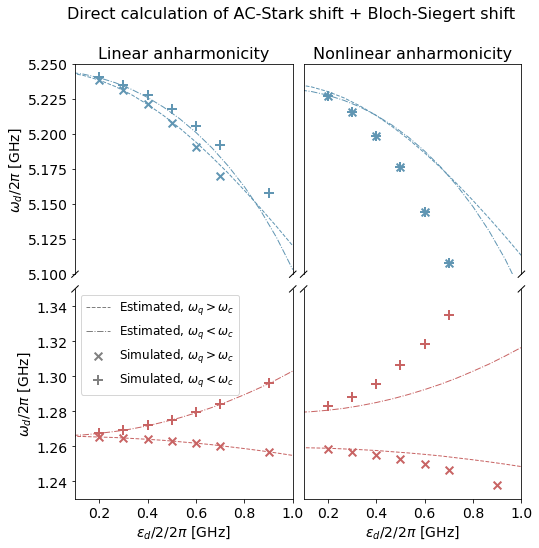

In [9]:
d = .015

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle("Direct calculation of AC-Stark shift + Bloch-Siegert shift")

plt.subplot(2, 2, 1)
plt.scatter(eps_larger[:-1], rwa_wd_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'])
plt.plot(eps_range, rwa_wd_th_sbs_blue_larger, '--', c=plotcolours['sbblue'])
plt.scatter(eps_smaller, rwa_wd_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'])
plt.plot(eps_range, rwa_wd_th_sbs_blue_smaller, '-.', c=plotcolours['sbblue'])
plt.xlim([0.1, 1])
plt.ylim([5.10, 5.25])
plt.ylabel("$\\omega_d/2\\pi$ [GHz]")
plt.title("Linear anharmonicity")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)

plt.subplot(2, 2, 3)
plt.scatter(eps_larger, rwa_wd_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'])
plt.plot(eps_range, rwa_wd_th_sbs_red_larger, '--', c=plotcolours['sbred'])
plt.scatter(eps_smaller, rwa_wd_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'])
plt.plot(eps_range, rwa_wd_th_sbs_red_smaller, '-.', c=plotcolours['sbred'])

plt.scatter(0, 0, marker='x', lw=2, s=60, c='gray', label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(0, 0, '--', c='gray', label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(0, 0, marker='+', lw=2, s=100, c='gray', label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(0, 0, '-.', c='gray', label="Estimated, $\\omega_q < \\omega_c$")

plt.xlim([0.1, 1])
plt.ylim([1.23, 1.35])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\omega_d/2\\pi$ [GHz]")
plt.legend()
plt.gca().spines['top'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)
plt.plot((-d,+d), (1-d,1+d), **kwargs)

plt.subplot(2, 2, 2)
plt.scatter(eps_larger, fp_wd_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(eps_range, fp_wd_th_sbs_blue_larger, '--', c=plotcolours['sbblue'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(eps_smaller, fp_wd_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(eps_range, fp_wd_th_sbs_blue_smaller, '-.', c=plotcolours['sbblue'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim([0.1, 1])
plt.ylim([5.10, 5.25])
plt.title("Nonlinear anharmonicity")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)

plt.subplot(2, 2, 4)
plt.scatter(eps_larger, fp_wd_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(eps_range, fp_wd_th_sbs_red_larger, '--', c=plotcolours['sbred'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(eps_smaller, fp_wd_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(eps_range, fp_wd_th_sbs_red_smaller, '-.', c=plotcolours['sbred'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim([0.1, 1])
plt.ylim([1.23, 1.35])
plt.xlabel("$\\epsilon_d/2/2\pi$ [GHz]")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
plt.gca().spines['top'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)
plt.plot((-d,+d), (1-d,1+d), **kwargs)

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.07)
plt.show()

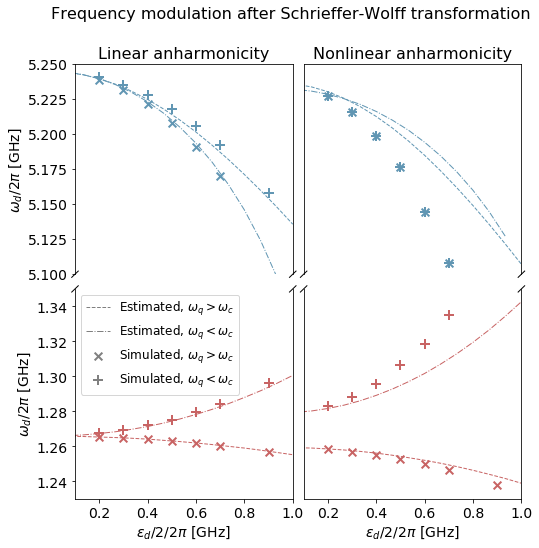

In [10]:
d = .015

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle("Frequency modulation after Schrieffer-Wolff transformation")

plt.subplot(2, 2, 1)
plt.scatter(eps_larger[:-1], rwa_wd_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'])
plt.plot(eps_range, rwa_wd_th_sw_blue_larger, '--', c=plotcolours['sbblue'])
plt.scatter(eps_smaller, rwa_wd_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'])
plt.plot(eps_range, rwa_wd_th_sw_blue_smaller, '-.', c=plotcolours['sbblue'])
plt.xlim([0.1, 1])
plt.ylim([5.10, 5.25])
plt.ylabel("$\\omega_d/2\\pi$ [GHz]")
plt.title("Linear anharmonicity")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)

plt.subplot(2, 2, 3)
plt.scatter(eps_larger, rwa_wd_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'])
plt.plot(eps_range, rwa_wd_th_sw_red_larger, '--', c=plotcolours['sbred'])
plt.scatter(eps_smaller, rwa_wd_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'])
plt.plot(eps_range, rwa_wd_th_sw_red_smaller, '-.', c=plotcolours['sbred'])

plt.scatter(0, 0, marker='x', lw=2, s=60, c='gray', label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(0, 0, '--', c='gray', label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(0, 0, marker='+', lw=2, s=100, c='gray', label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(0, 0, '-.', c='gray', label="Estimated, $\\omega_q < \\omega_c$")

plt.xlim([0.1, 1])
plt.ylim([1.23, 1.35])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\omega_d/2\\pi$ [GHz]")
plt.legend()
plt.gca().spines['top'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)
plt.plot((-d,+d), (1-d,1+d), **kwargs)

plt.subplot(2, 2, 2)
plt.scatter(eps_larger, fp_wd_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(eps_range, fp_wd_th_sw_blue_larger, '--', c=plotcolours['sbblue'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(eps_smaller, fp_wd_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(eps_range[:-1], fp_wd_th_sw_blue_smaller[:-1], '-.', c=plotcolours['sbblue'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim([0.1, 1])
plt.ylim([5.10, 5.25])
plt.title("Nonlinear anharmonicity")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)

plt.subplot(2, 2, 4)
plt.scatter(eps_larger, fp_wd_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(eps_range, fp_wd_th_sw_red_larger, '--', c=plotcolours['sbred'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(eps_smaller, fp_wd_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(eps_range, fp_wd_th_sw_red_smaller, '-.', c=plotcolours['sbred'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim([0.1, 1])
plt.ylim([1.23, 1.35])
plt.xlabel("$\\epsilon_d/2/2\pi$ [GHz]")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
plt.gca().spines['top'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)
plt.plot((-d,+d), (1-d,1+d), **kwargs)

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.07)
plt.show()

In [4]:
# fig, axes = plt.subplots(1, 1, figsize=(6, 3))
# # fig.suptitle("Transmon, single-tone drive")

# ax1 = plt.subplot(1, 1, 1)
# ax1.scatter(wd_red_larger, wsb_red_larger, marker='s', c=plotcolours['sbred'], s=100*np.asarray(eps_larger))
# # ax1.scatter(wd_red_smaller, wsb_red_smaller, marker='o', c=plotcolours['sbred'], s=100*np.asarray(eps_smaller))
# ax1.plot(wd_red_larger, wsb_red_larger, c=plotcolours['sbred'])
# # ax1.plot(wd_red_smaller, wsb_red_smaller, '--', c=plotcolours['sbred'])
# ax1.set_xlabel("$\\omega_d/2\\pi$ [GHz] (red)")
# ax1.set_ylim([0, 0.014])
# ax2 = ax1.twiny()
# ax2.scatter(wd_blue_larger, wsb_blue_larger, marker='s', c=plotcolours['sbblue'], s=100*np.asarray(eps_larger))
# # ax2.scatter(wd_blue_smaller, wsb_blue_smaller, marker='o', c=plotcolours['sbblue'], s=100*np.asarray(eps_smaller))
# ax2.plot(wd_blue_larger, wsb_blue_larger, c=plotcolours['sbblue'], label='$\\omega_q > \\omega_c$')
# # ax2.plot(wd_blue_smaller, wsb_blue_smaller, '--', c=plotcolours['sbblue'], label='$\\omega_q < \\omega_c$')

# ax2.set_xlabel("$\\omega_d/2\\pi$ [GHz] (blue)")
# ax2.tick_params(axis='x')
# ax1.set_ylabel("$\\eps_{{sb}}/2\\pi$ [GHz]")
# plt.legend()

# # plt.tight_layout()
# # fig.subplots_adjust(top=0.77)
# plt.show()

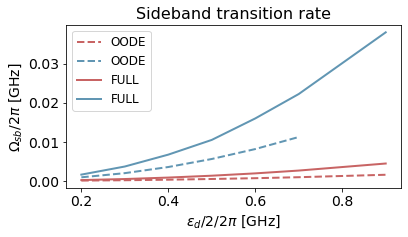

In [5]:
plt.figure(figsize=[6,3])
plt.subplot(1, 1, 1)
plt.plot(eps_larger, rwa_wsb_red_larger, '--', c=plotcolours['sbred'], label='OODE')
plt.plot(eps_larger[:-1], rwa_wsb_blue_larger, '--', c=plotcolours['sbblue'], label='OODE')
plt.plot(eps_larger, fp_wsb_red_larger, c=plotcolours['sbred'], label='FULL')
plt.plot(eps_larger, fp_wsb_blue_larger, c=plotcolours['sbblue'], label='FULL')
# plt.plot(eps_smaller, wsb_red_smaller, '-.', c=plotcolours['sbred'])
# plt.plot(eps_smaller, wsb_blue_smaller, '-.', c=plotcolours['sbblue'], label='$\\omega_q < \\omega_c$')
# plt.xlim([0, 1])
# plt.ylim([0, 0.014])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\eps_{{sb}}/2\\pi$ [GHz]")
plt.title("Sideband transition rate")
plt.legend()
plt.show()

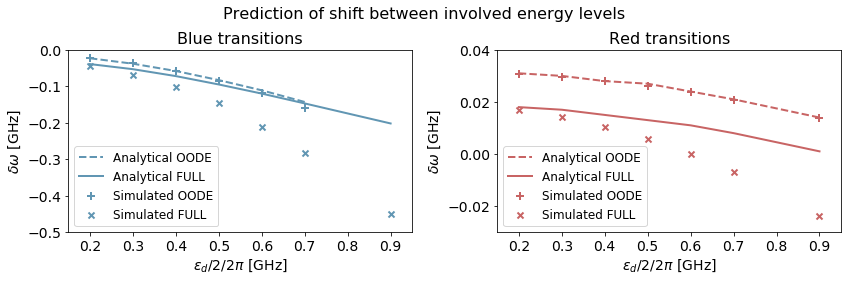

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Prediction of shift between involved energy levels")

plt.subplot(1, 2, 1)
plt.scatter(eps_larger[:-1], rwa_shift_blue_larger, marker='+', s=80, c=plotcolours['sbblue'], alpha=alpha, label="Simulated OODE")
plt.plot(eps_larger[:-1], rwa_shift_th_blue_larger, '--', c=plotcolours['sbblue'], alpha=alpha, label="Analytical OODE")
plt.scatter(eps_larger, fp_shift_blue_larger, marker='x', c=plotcolours['sbblue'], alpha=alpha, label="Simulated FULL")
plt.plot(eps_larger, fp_shift_th_blue_larger, '-', c=plotcolours['sbblue'], alpha=alpha, label="Analytical FULL")
plt.xlim([0.15, 0.95])
plt.ylim([-0.5, 0])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\delta\\omega$ [GHz]")
plt.title("Blue transitions")
# plt.title("Drive frequency deviation")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(eps_larger, rwa_shift_red_larger, marker='+', s=80, c=plotcolours['sbred'], alpha=alpha, label="Simulated OODE")
plt.plot(eps_larger, rwa_shift_th_red_larger, '--', c=plotcolours['sbred'], alpha=alpha, label="Analytical OODE")
plt.scatter(eps_larger, fp_shift_red_larger, marker='x', c=plotcolours['sbred'], alpha=alpha, label="Simulated FULL")
plt.plot(eps_larger, fp_shift_th_red_larger, '-', c=plotcolours['sbred'], alpha=alpha, label="Analytical FULL")
plt.xlim([0.15, 0.95])
plt.ylim([-0.03, 0.04])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\delta\\omega$ [GHz]")
plt.title("Red transitions")
plt.legend()

plt.tight_layout()
fig.subplots_adjust(top=0.83)
plt.show()